<a href="https://colab.research.google.com/github/Cherry63/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import datetime as dt

import os


import plotly.express as px

%matplotlib inline



In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv',sep=";", parse_dates=['Year_Birth' , 'Dt_Customer'])
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [4]:
df.shape

(2240, 29)

In [5]:
df.size

64960

In [6]:
df.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000



Preparing Data


In [7]:


missingValues = df.isna().sum().to_dict()
missingValues_df = pd.DataFrame(list(missingValues.items()), columns = ['Column', 'Missing_Values'])
# missingValues_df

fig = px.bar(missingValues_df,
            x = 'Column', y = 'Missing_Values',
#             template = 'plotly_red',
            title = 'Missing Values')
fig.show()



In [8]:
df = df.dropna()
df.shape

(2216, 29)

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Month_Customer'] = 12.0 * (2015 - df.Dt_Customer.dt.year ) + (1 - df.Dt_Customer.dt.month)

df['Dt_Customer']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

In [10]:
df['Month_Customer'] 

0       28.0
1       10.0
2       17.0
3       11.0
4       12.0
        ... 
2235    19.0
2236     7.0
2237    12.0
2238    12.0
2239    27.0
Name: Month_Customer, Length: 2216, dtype: float64

In [11]:
df['Total_Spending'] = (df.MntWines + df.MntFruits + 
                              df.MntMeatProducts + df.MntFishProducts + 
                              df.MntSweetProducts + df.MntGoldProds)

df['Total_Spending'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    1617
1      27
2     776
3      53
4     422
Name: Total_Spending, dtype: int64

In [12]:
df['Average_Spending'] = ((df.MntWines + df.MntFruits + 
                              df.MntMeatProducts + df.MntFishProducts + 
                              df.MntSweetProducts + df.MntGoldProds)/6)
df['Average_Spending'].head()

0    269.500000
1      4.500000
2    129.333333
3      8.833333
4     70.333333
Name: Average_Spending, dtype: float64

In [13]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Children']



0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2216, dtype: int64

In [14]:
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})
df['Marital_Status'].head()

0     Single
1     Single
2    Partner
3    Partner
4    Partner
Name: Marital_Status, dtype: object

Text(0.5, 1.0, 'Visualizing for Outliers in Income of the Customers')

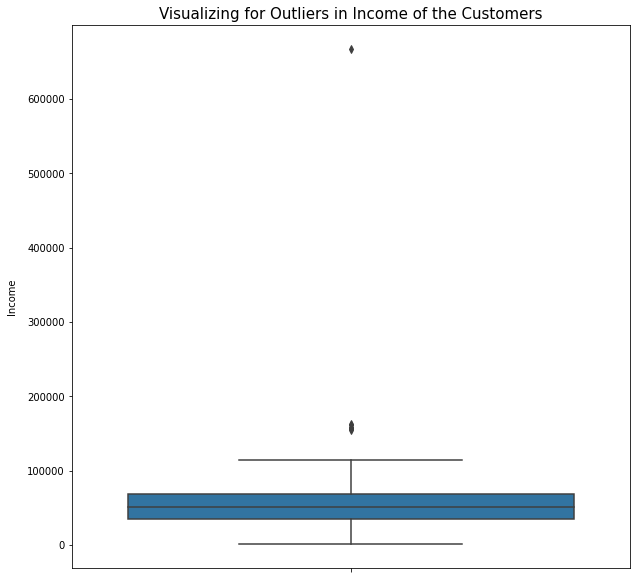

In [15]:
plt.figure(figsize = (10, 10))
sns.boxplot(y = df.Income)
plt.ylabel('Income', fontsize = 10, labelpad = 10)
plt.title('Visualizing for Outliers in Income of the Customers', fontsize = 15)

In [16]:
df = df[df.Income < 120000]


Exploratory Data Analysis


In [17]:

#Marital Status Analysis


In [18]:


maritalStatus = df.Marital_Status.value_counts()
# maritalStatus

fig = px.pie(maritalStatus,
             values = maritalStatus.values,
             names = maritalStatus.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Marital Status')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 3)))
fig.show()




Marital Spending


Text(0.5, 1.0, 'Relation b/w Marital Status and Average Spending')

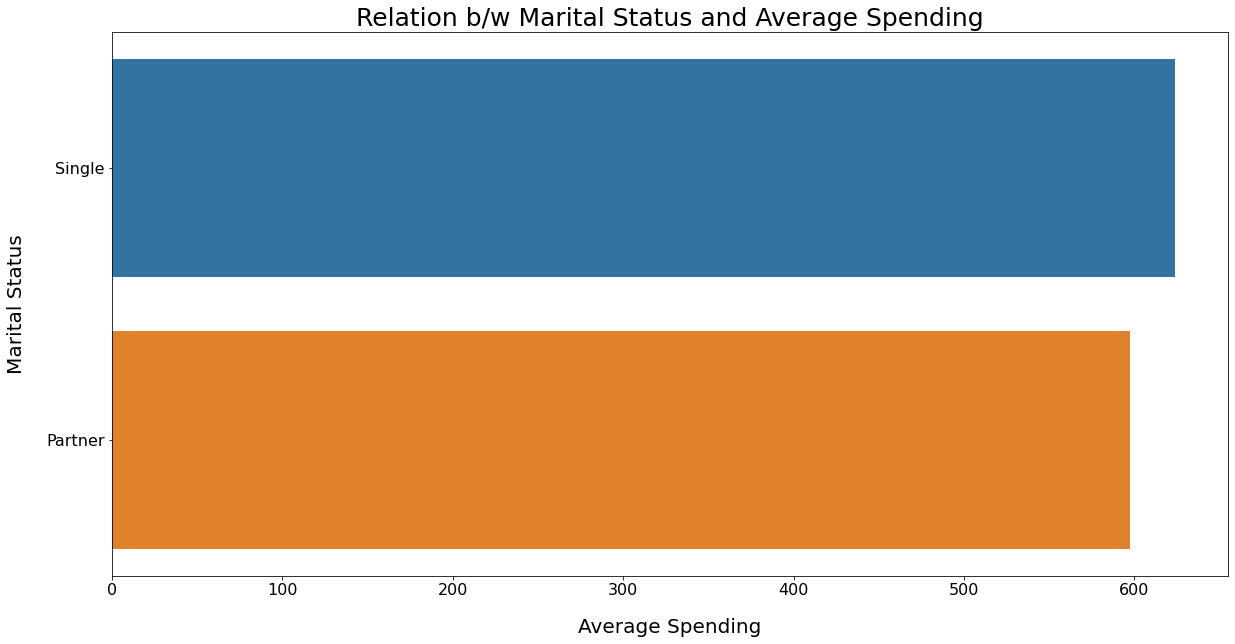

In [19]:
maritalSpending = df.groupby('Marital_Status')['Total_Spending'].mean().sort_values(ascending = False)
maritalSpending_df = pd.DataFrame(list(maritalSpending.items()), columns = ['Marital Status', 'Average Spending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = maritalSpending_df, x = 'Average Spending', y = 'Marital Status');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Average Spending', fontsize = 20, labelpad = 20)
plt.ylabel('Marital Status', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Marital Status and Average Spending', fontsize = 25)


Education


In [20]:


education = df.Education.value_counts()

fig = px.pie(education,
             values = education.values,
             names = education.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Education Level of the Customers')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()




Childrens


In [21]:
children = df.Children.value_counts()

fig = px.pie(education,
             values = children.values,
             names = children.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Number of Children in Customers house')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


Children wise Average Spending


Text(0.5, 1.0, 'Relation b/w Number of Children and Average Spending')

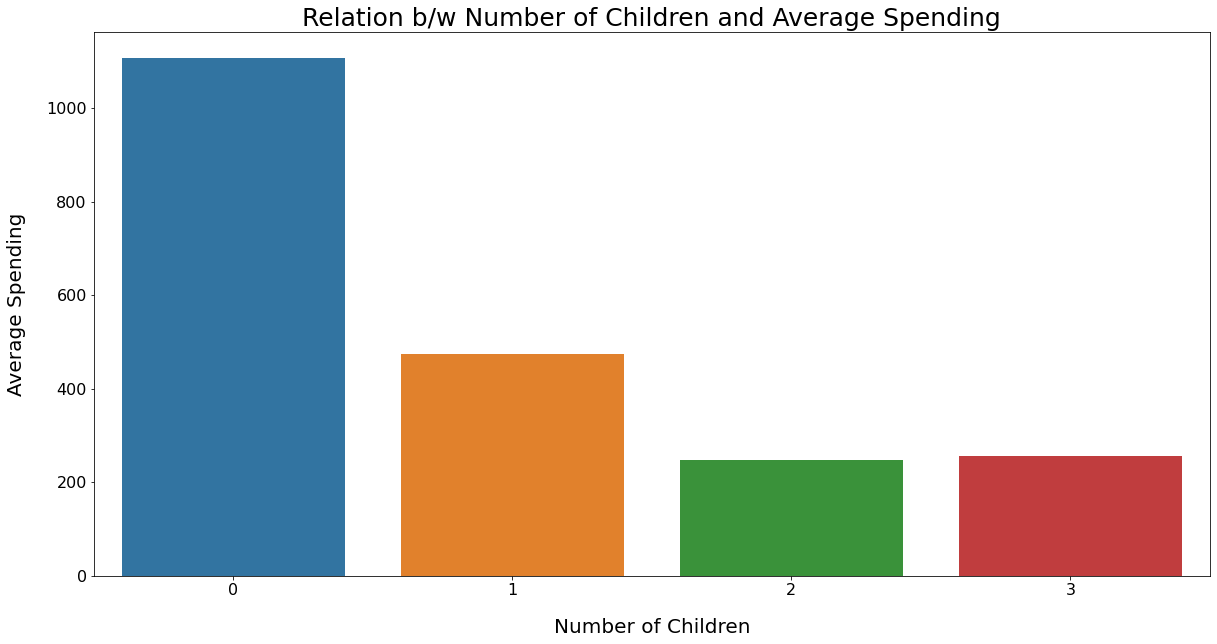

In [22]:


childrenSpending = df.groupby('Children')['Total_Spending'].mean().sort_values(ascending = False)
childrenSpending_df = pd.DataFrame(list(childrenSpending.items()), columns = ['Children', 'AverageSpending'])

plt.figure(figsize = (20, 10))
sns.barplot(data = childrenSpending_df, x = 'Children', y = 'AverageSpending');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Number of Children', fontsize = 20, labelpad = 20)
plt.ylabel('Average Spending', fontsize = 20, labelpad = 20)
plt.title('Relation b/w Number of Children and Average Spending', fontsize = 25)




Histogram based on age of the Customers


Text(0, 0.5, 'Count')

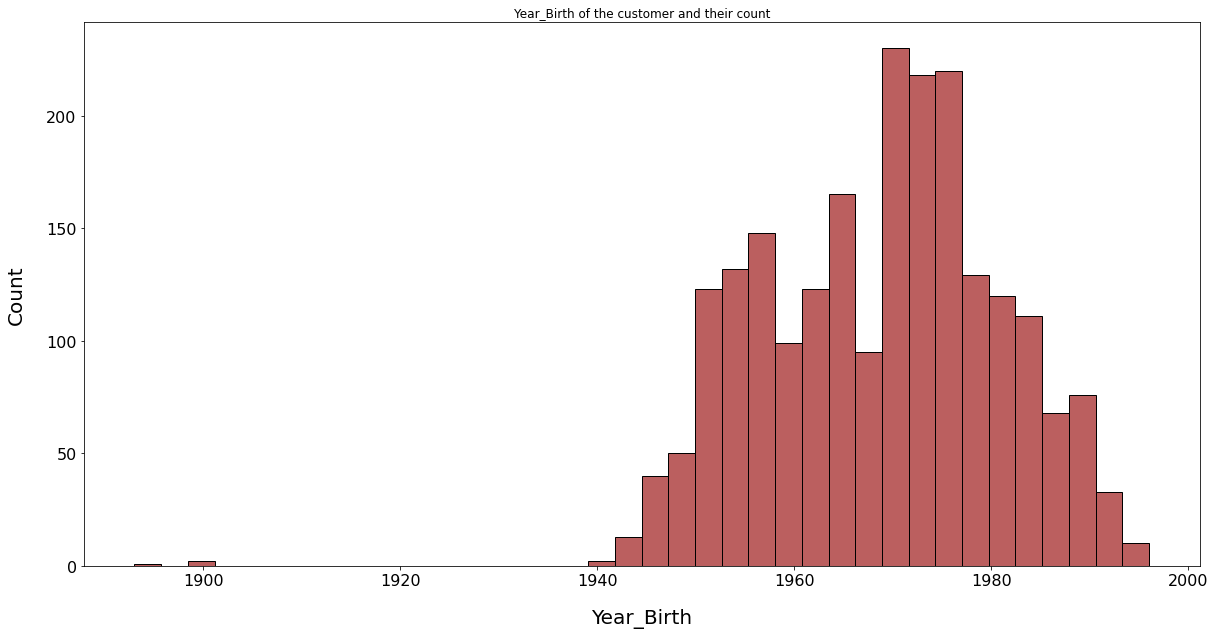

In [23]:
plt.figure(figsize = (20, 10))
ax = sns.histplot(data = df.Year_Birth, color = 'brown');
ax.set(title = 'Year_Birth of the customer and their count')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Year_Birth', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)


Relation between Age and Spending


Text(0.5, 1.0, 'Year_Birth of the Customer and their Total Spending')

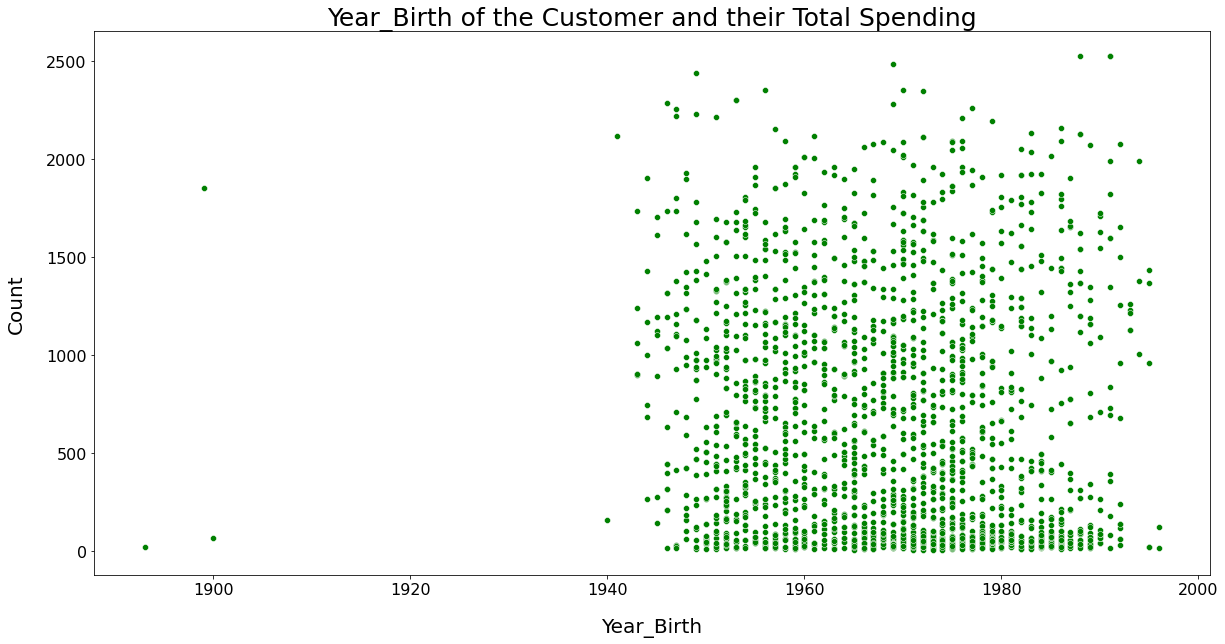

In [27]:
plt.figure(figsize = (20, 10))
ax = sns.scatterplot(x = df.Year_Birth, y = df.Total_Spending, color = 'green');
# ax.set(title = 'Year_Birth of the Customer and their Total Spending', fontsize = 25)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Year_Birth', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)
plt.title('Year_Birth of the Customer and their Total Spending', fontsize = 25)




Customer Segmentation Year_Birth Group wise


In [29]:
Year_Birth  = df.Year_Birth .value_counts()

fig = px.pie(Year_Birth , values = Year_Birth .values, names = Year_Birth .index, width = 550,
             height = 550, title = 'Customer Segmentation Age Group wise')

fig.update_traces(textposition = 'inside',
                 textinfo = 'percent+label',
                 hole = 0.750,
                 marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                              line = dict(color = 'white', width = 2)))
fig.update_layout(annotations = [dict(text = 'Year_Birth Groups', x = 0.5, y = 0.5, font_size = 36,
                                      showarrow = False, font_color = 'Black')],
                  showlegend = True)


fig.show()




Income Distribution of customers


Text(0, 0.5, 'Count')

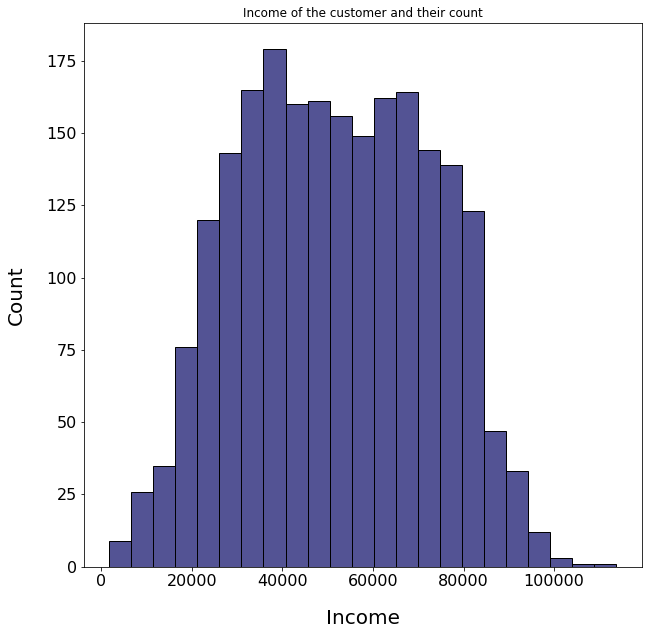

In [31]:
plt.figure(figsize = (10, 10))
ax = sns.histplot(data = df.Income, color = 'midnightblue');
ax.set(title = 'Income of the customer and their count')

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Count', fontsize = 20, labelpad = 20)


Relation between Total Spending and Income


Text(0.5, 1.0, 'Income of the Customer and their Total Spending')

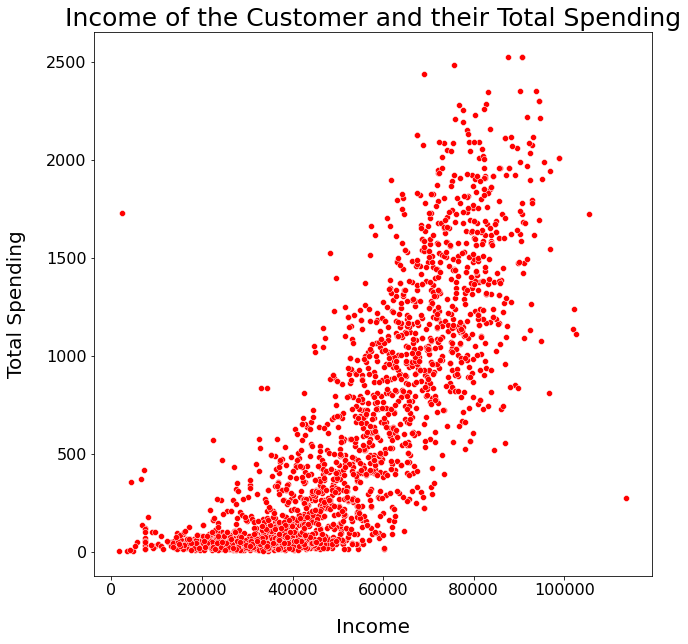

In [32]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = df.Income, y = df.Total_Spending, color = 'Red');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Total Spending', fontsize = 20, labelpad = 20)
plt.title('Income of the Customer and their Total Spending', fontsize = 25)


Cluster Modelling


In [34]:
X = df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response'], axis=1)
X.head()

,Income,Month_Customer,Total_Spending,Average_Spending,Children
0,58138.0,28.0,1617,269.500000,0
1,46344.0,10.0,27,4.500000,2
2,71613.0,17.0,776,129.333333,0
3,26646.0,11.0,53,8.833333,1
4,58293.0,12.0,422,70.333333,1



Chosing No. of Cluster using Elbow Method


Text(0.5, 1.0, 'Number of Clusters VS Inertia')

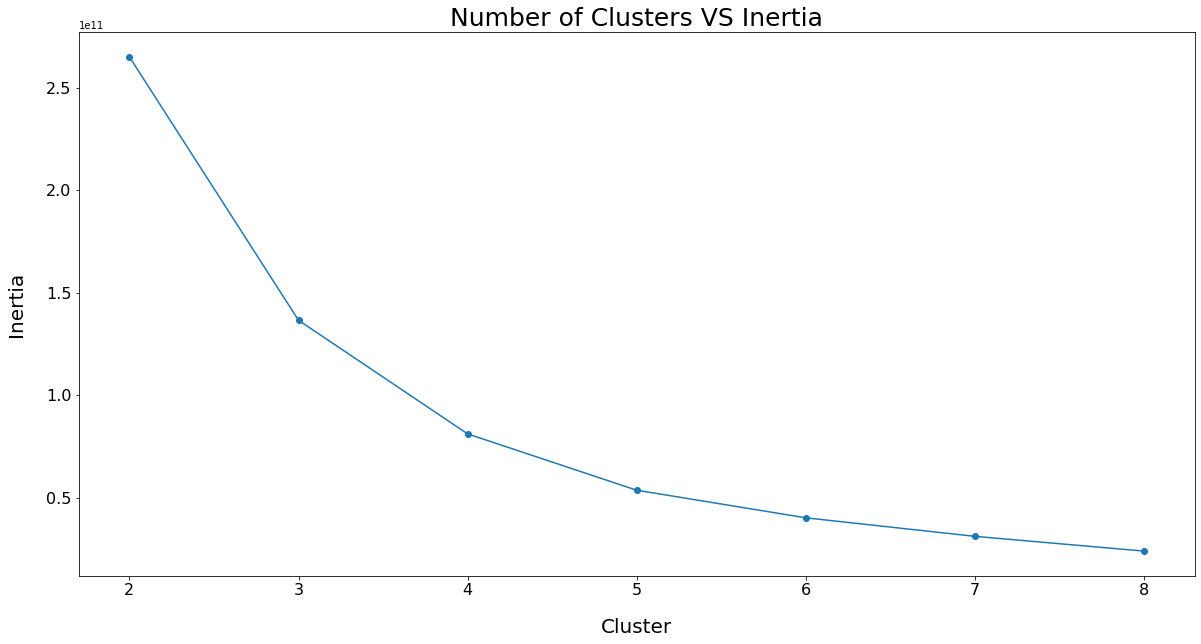

In [35]:
from sklearn.cluster import KMeans
options = range(2, 9)
inertias = []

for n_cluster in options:
    model = KMeans(n_cluster, random_state = 42).fit(X)
    inertias.append(model.inertia_)
    
plt.figure(figsize = (20, 10))
plt.plot(options, inertias, '-o');

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Inertia', fontsize = 20, labelpad = 20)
plt.title('Number of Clusters VS Inertia', fontsize = 25)

In [36]:


model = KMeans(4, init ='k-means++', random_state = 42).fit(X)

preds = model.predict(X)

customer_clusters = X.copy()
customer_clusters['Clusters'] = preds
customer_clusters.head()



,Income,Month_Customer,Total_Spending,Average_Spending,Children,Clusters
0,58138.0,28.0,1617,269.500000,0,0
1,46344.0,10.0,27,4.500000,2,3
2,71613.0,17.0,776,129.333333,0,2
3,26646.0,11.0,53,8.833333,1,1
4,58293.0,12.0,422,70.333333,1,0



Cluster Idenification


Text(0.5, 1.0, 'Clusters VS Income')

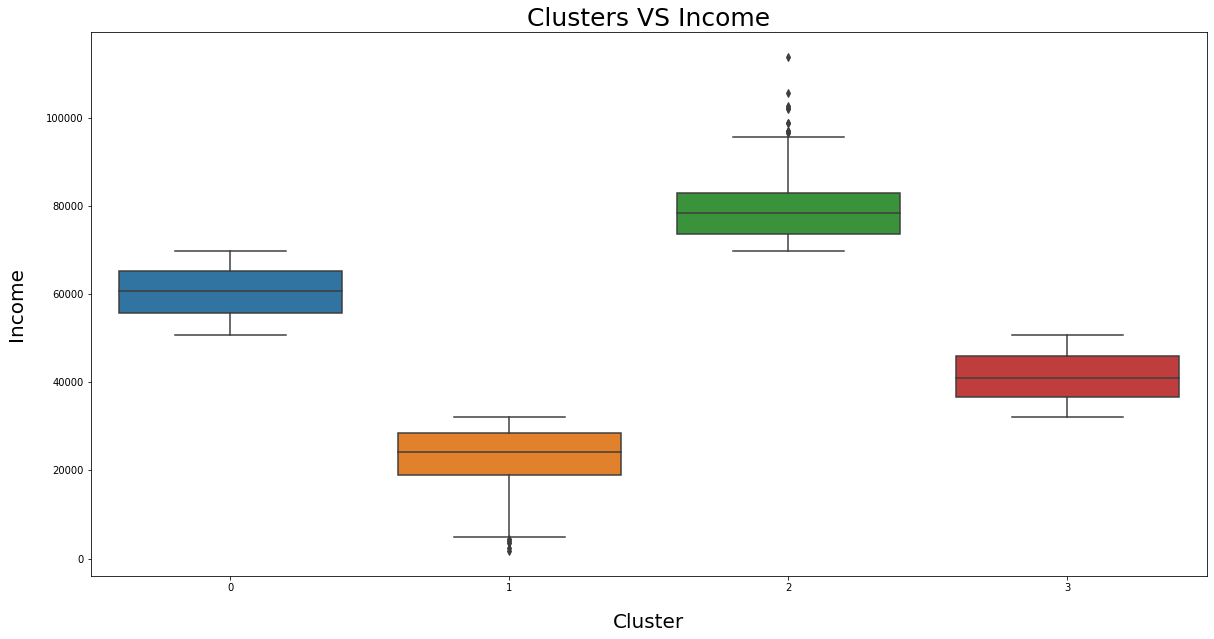

In [42]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Income')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Income', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Income', fontsize = 25)

Text(0.5, 1.0, 'Clusters VS Month_Customer')

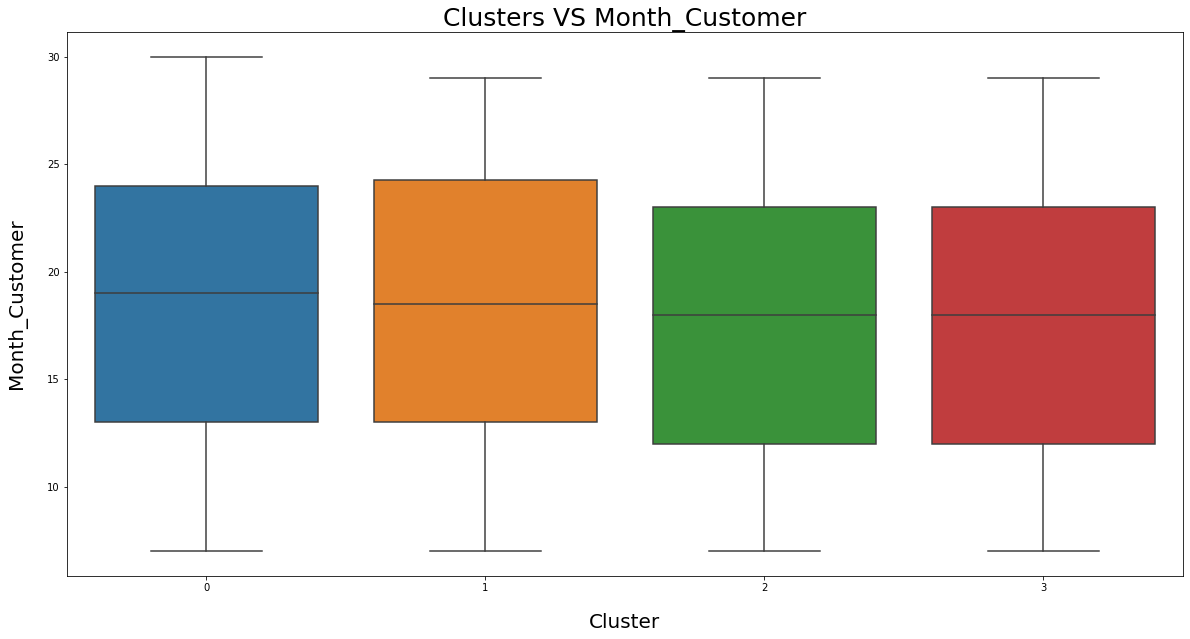

In [44]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Month_Customer')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Month_Customer', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Month_Customer', fontsize = 25)



Text(0.5, 1.0, 'Clusters VS Total_Spending')

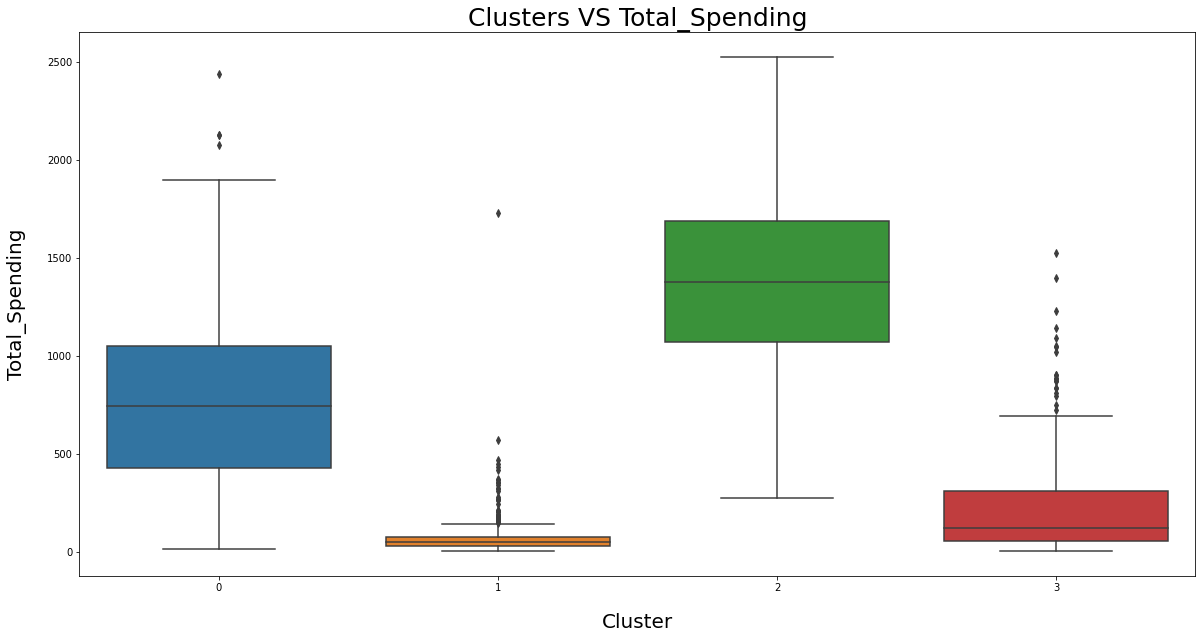

In [45]:


plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Total_Spending')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Total_Spending', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Total_Spending', fontsize = 25)



Text(0.5, 1.0, 'Clusters VS Average_Spending')

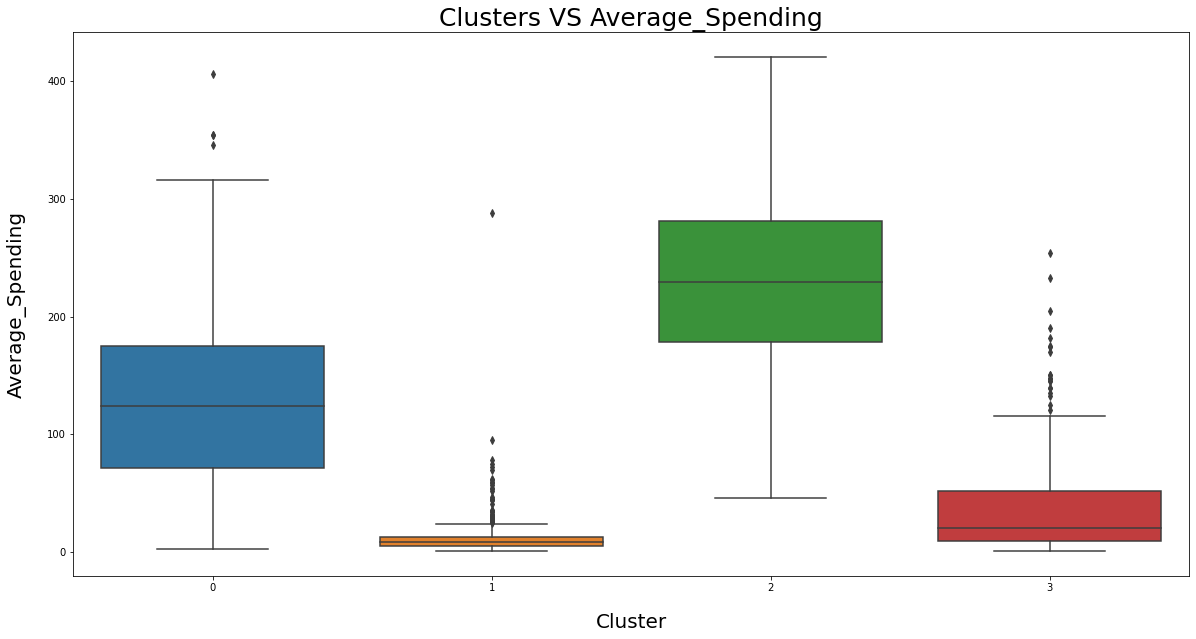

In [46]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Average_Spending')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Average_Spending', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Average_Spending', fontsize = 25)

Text(0.5, 1.0, 'Clusters VS Children')

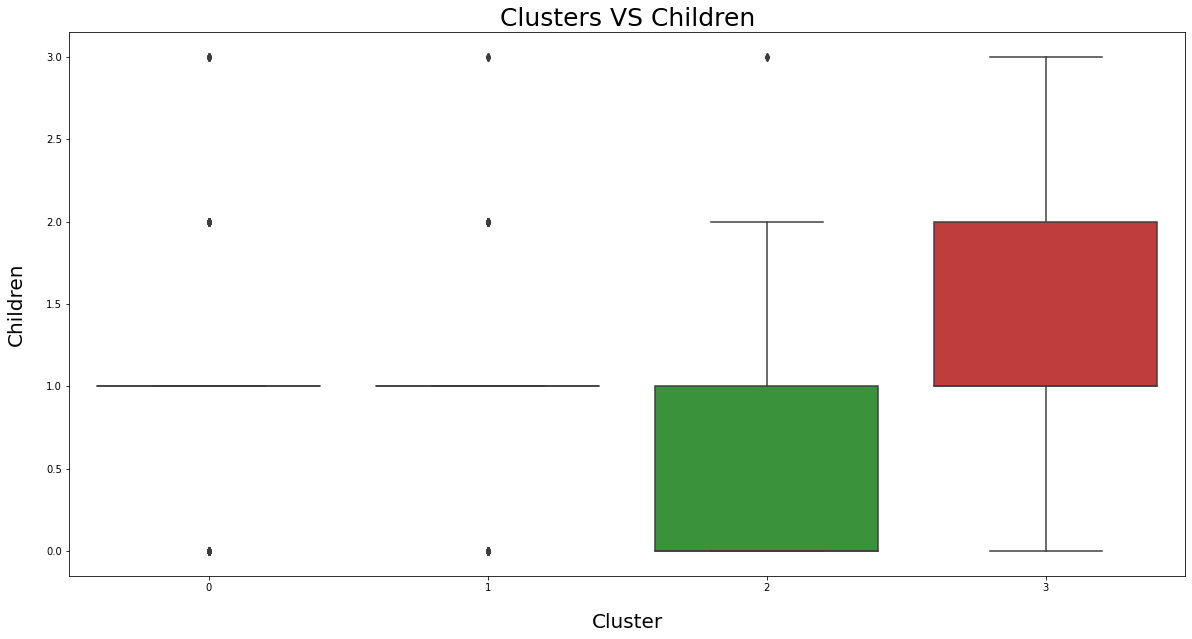

In [47]:
plt.figure(figsize = (20, 10))

sns.boxplot(data = customer_clusters, x = 'Clusters', y = 'Children')
plt.xlabel('Cluster', fontsize = 20, labelpad = 20)
plt.ylabel('Children', fontsize = 20, labelpad = 20)
plt.title('Clusters VS Children', fontsize = 25)


Cluster interpretation


In [50]:


customer_clusters.Clusters = customer_clusters.Clusters.replace({1: 'Diamond',
                                                       2: 'Platinum',
                                                       0: 'Silver',
                                                       3: 'Gold'}) 
df['Clusters'] = customer_clusters.Clusters
df.head(10)



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Month_Customer,Total_Spending,Average_Spending,Children,Clusters
0,5524,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,28.0,1617,269.500000,0,Silver
1,2174,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,10.0,27,4.500000,2,Gold
2,4141,1965-01-01,Graduation,Partner,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,17.0,776,129.333333,0,Platinum
3,6182,1984-01-01,Graduation,Partner,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,11.0,53,8.833333,1,Diamond
4,5324,1981-01-01,PhD,Partner,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,12.0,422,70.333333,1,Silver
5,7446,1967-01-01,Master,Partner,62513.0,0,1,2013-09-09,16,520,...,0,0,3,11,0,16.0,716,119.333333,1,Silver
6,965,1971-01-01,Graduation,Single,55635.0,0,1,2012-11-13,34,235,...,0,0,3,11,0,26.0,590,98.333333,1,Silver
7,6177,1985-01-01,PhD,Partner,33454.0,1,0,2013-05-08,32,76,...,0,0,3,11,0,20.0,169,28.166667,1,Gold
8,4855,1974-01-01,PhD,Partner,30351.0,1,0,2013-06-06,19,14,...,0,0,3,11,1,19.0,46,7.666667,1,Diamond
9,5899,1950-01-01,PhD,Partner,5648.0,1,1,2014-03-13,68,28,...,0,0,3,11,0,10.0,49,8.166667,2,Diamond



Relation of Cluster and Number of Customers


In [51]:


clusterCounts = df.Clusters.value_counts()

fig = px.pie(clusterCounts,
             values = clusterCounts.values,
             names = clusterCounts.index,
             color_discrete_sequence = px.colors.sequential.RdBu,
            title = 'Number of Clusters and Customers')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                 marker = dict(line = dict(color = 'white', width = 2)))
fig.show()




Relationship between Income and Total Spending


Text(0.5, 1.0, 'Income of the Customer and their Total Spending')

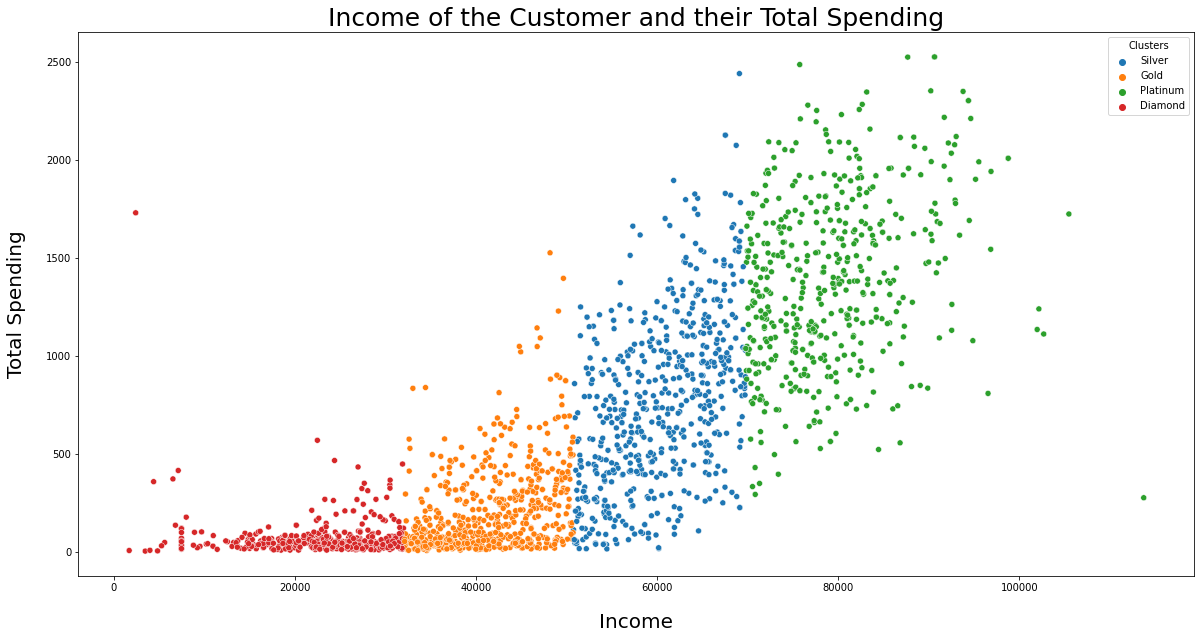

In [52]:


plt.figure(figsize = (20, 10))
ax = sns.scatterplot(data = df, x = 'Income', y = 'Total_Spending', hue = 'Clusters');
# ax.set(title = 'Age of the Customer and their Total Spending', fontsize = 25)

# plt.xticks(fontsize = 16)
# plt.yticks(fontsize = 16)
plt.xlabel('Income', fontsize = 20, labelpad = 20)
plt.ylabel('Total Spending', fontsize = 20, labelpad = 20)
plt.title('Income of the Customer and their Total Spending', fontsize = 25)




Product wise clusters customer buying


<Figure size 3600x1800 with 0 Axes>

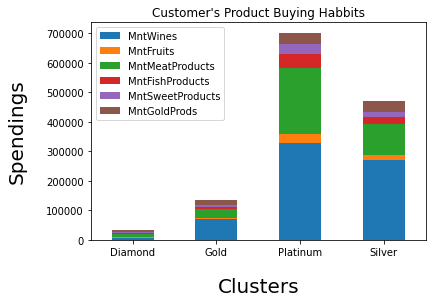

In [53]:
cluster_spendings = df.groupby('Clusters')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                                                  'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(50, 25))
cluster_spendings.plot(kind = 'bar', stacked = True)

plt.title('Customer\'s Product Buying Habbits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 2160x1080 with 0 Axes>

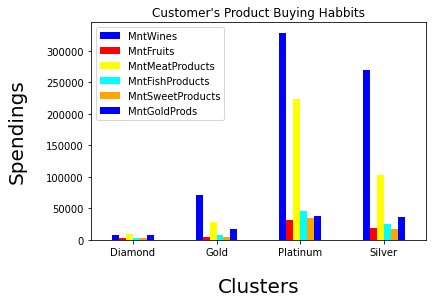

In [54]:
plt.figure(figsize=(30, 15))
cluster_spendings.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange'])

plt.title('Customer\'s Product Buying Habbits')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');


Customers purchasing platform pattern


In [55]:


cluster_purchases = df.groupby('Clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()



<Figure size 2160x1080 with 0 Axes>

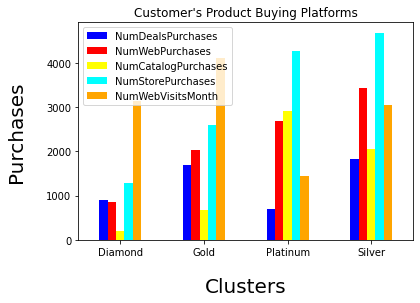

In [56]:
plt.figure(figsize=(30, 15))
cluster_purchases.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange'])

plt.title('Customer\'s Product Buying Platforms')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Purchases', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');


Promotion Acceptance by Customers


<Figure size 2160x1080 with 0 Axes>

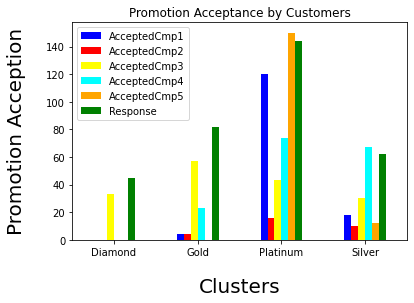

In [57]:
cluster_campaign = df.groupby('Clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()
plt.figure(figsize=(30, 15))
cluster_campaign.plot(kind = 'bar', color = ['blue', 'red', 'yellow', 'cyan', 'orange', 'green'])

plt.title('Promotion Acceptance by Customers')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Promotion Acception', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');